In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 分析用户表

#### 读取数据

In [3]:
df_user = pd.read_csv('./data/BX-Users.csv',sep=';')
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### 修改列名

In [4]:
df_user.columns = ['user_id','location','age']
df_user.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### 分析location

In [7]:
location_value_counts = df_user['location'].value_counts()

In [8]:
location_value_counts.count()

57339

#### 平均每个地区，存在的用户个数

In [9]:
location_value_counts.sum() / location_value_counts.count()

4.863321648441723

#### 把location变成国家

In [13]:
df_user['location'] = df_user['location'].apply(lambda location:location.rsplit(',',maxsplit=1)[-1].strip())

In [16]:
len(df_user['location'].unique())

709

In [17]:
location_value_counts = df_user['location'].value_counts()

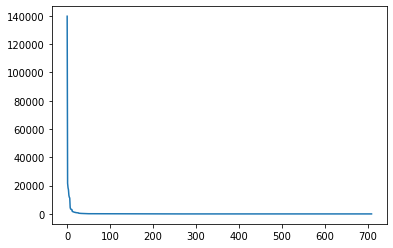

In [19]:
plt.plot(
    range(len(location_value_counts)),
    location_value_counts,
)
plt.show()

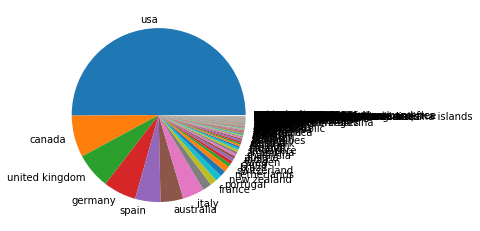

In [20]:
plt.pie(
    location_value_counts,
    labels = location_value_counts.index
)
plt.show()

#### 分析 年龄

In [24]:
df_user[
    df_user['age'].isnull()
].head()

,user_id,location,age
0,1,usa,NaN
2,3,russia,NaN
4,5,united kingdom,NaN
6,7,usa,NaN
7,8,canada,NaN


In [26]:
df_user[
    df_user['age'].isnull()
].count()

user_id     110762
location    110762
age              0
dtype: int64

In [27]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
user_id     278858 non-null int64
location    278858 non-null object
age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [31]:
df_user_age_notnull = df_user[~df_user['age'].isnull()]
df_user_age_notnull.head()

,user_id,location,age
1,2,usa,18.0
3,4,portugal,17.0
5,6,usa,61.0
9,10,spain,26.0
10,11,australia,14.0


In [34]:
age_value_counts_sort_by_age = df_user_age_notnull['age'].value_counts().sort_index()

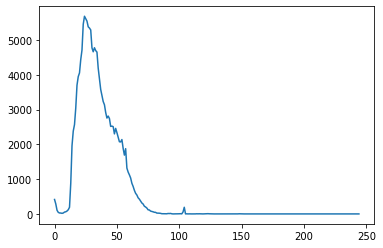

In [35]:
plt.plot(
    age_value_counts_sort_by_age.index,
    age_value_counts_sort_by_age
)
plt.show()

In [36]:
def divide_age(age):
    """
    :return:
        Nan,0-6,>100  --> 0 年龄填写有误
        7 - 12        --> 1 少儿
        13 - 17       --> 2 青少年
        18 - 45       --> 3 青年
        46 - 69       --> 4 中年
        70 - 100      --> 5 老年
    """
    if np.isnan(age) or (age <= 6) or (age > 100):
        return 0
    if age >= 7 and age <= 12:
        return 1
    if age >= 13 and age <= 17:
        return 2
    if age >= 18 and age <= 45:
        return 3
    if age >= 46 and age <= 69:
        return 4
    if age >= 70 and age <= 100:
        return 5
df_user['age'] = df_user['age'].apply(divide_age)

In [37]:
df_user.head()

,user_id,location,age
0,1,usa,0
1,2,usa,3
2,3,russia,0
3,4,portugal,2
4,5,united kingdom,0


#### 分析年龄段

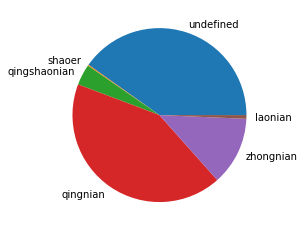

In [39]:
plt.pie(
    df_user['age'].value_counts().sort_index(),
    labels = ['undefined','shaoer','qingshaonian','qingnian','zhongnian','laonian']
)
plt.show()

# 分析打分表

#### 读取数据

In [40]:
df_rating = pd.read_csv('./data/BX-Book-Ratings.csv',sep=';')
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [41]:
df_rating.columns = ['user_id','item_id','rating']
df_rating.head()

,user_id,item_id,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [42]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149780 non-null int64
item_id    1149780 non-null object
rating     1149772 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


#### 删除有误数据

In [43]:
df_rating = df_rating.dropna()
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149772 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149772 non-null int64
item_id    1149772 non-null object
rating     1149772 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.1+ MB


#### 用户活跃度

In [46]:
user_value_counts = df_rating['user_id'].value_counts()

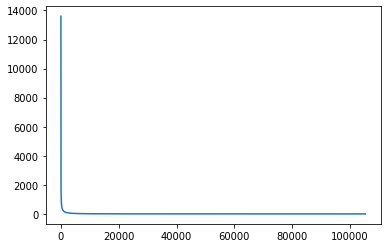

In [47]:
plt.plot(
    range(len(user_value_counts)),
    user_value_counts,
)
plt.show()

#### 商品流行度分析

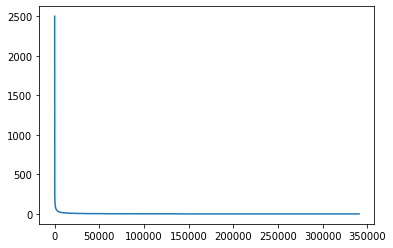

In [48]:
item_value_counts = df_rating['item_id'].value_counts()
plt.plot(
    range(len(item_value_counts)),
    item_value_counts,
)
plt.show()

In [49]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149772 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149772 non-null int64
item_id    1149772 non-null object
rating     1149772 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.1+ MB


In [50]:
df_rating['rating'] = df_rating['rating'].astype(int)
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149772 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149772 non-null int64
item_id    1149772 non-null object
rating     1149772 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 30.7+ MB


# 合并用户表与打分表

In [51]:
df_user.head()

,user_id,location,age
0,1,usa,0
1,2,usa,3
2,3,russia,0
3,4,portugal,2
4,5,united kingdom,0


In [52]:
df_rating.head()

,user_id,item_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [53]:
df_data = pd.merge(
    df_user,
    df_rating,
    on='user_id',
    how='inner',
)
df_data.head()

,user_id,location,age,item_id,rating
0,2,usa,3,0195153448,0
1,7,usa,0,034542252,0
2,8,canada,0,0002005018,5
3,8,canada,0,0060973129,0
4,8,canada,0,0374157065,0


In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149772 entries, 0 to 1149771
Data columns (total 5 columns):
user_id     1149772 non-null int64
location    1149772 non-null object
age         1149772 non-null int64
item_id     1149772 non-null object
rating      1149772 non-null int32
dtypes: int32(1), int64(2), object(2)
memory usage: 48.2+ MB


In [55]:
df_data['age'] = df_data['age'].astype(int)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149772 entries, 0 to 1149771
Data columns (total 5 columns):
user_id     1149772 non-null int64
location    1149772 non-null object
age         1149772 non-null int32
item_id     1149772 non-null object
rating      1149772 non-null int32
dtypes: int32(2), int64(1), object(2)
memory usage: 43.9+ MB


# 保存表

In [57]:
import _pickle as cPickle

In [58]:
cPickle.dump(
    df_data,
    open('./data/df_data.pkl','wb')
)

In [59]:
object1 = cPickle.load(
    open('./data/df_data.pkl','rb')
)

In [61]:
object1.head()

,user_id,location,age,item_id,rating
0,2,usa,3,0195153448,0
1,7,usa,0,034542252,0
2,8,canada,0,0002005018,5
3,8,canada,0,0060973129,0
4,8,canada,0,0374157065,0
